 #  Author : CHAHIDI Khadija

<h1 style="font-size:3rem;color:red;">TASK 1 : Prediction using   Supervised ML</h1>
    

#  Importing all libraries required

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

#  Importing& reading the data

In [4]:
#data url
url="http://bit.ly/w-data"
# creating a DataFrame
df=pd.read_csv(url)
#reading the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Description

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

In [9]:
print("numbre of duplicate rows:" ,df.duplicated().sum())

numbre of duplicate rows: 0


# Plotting data

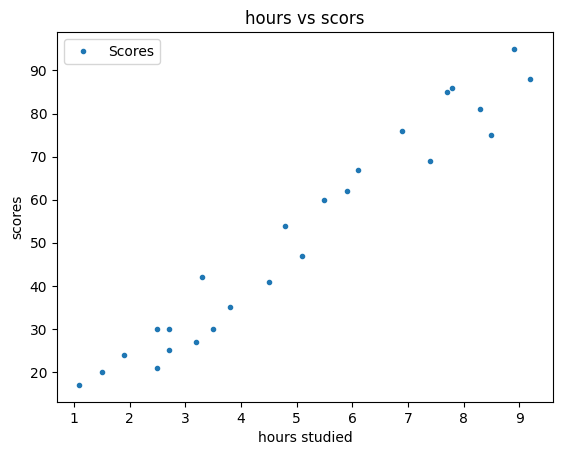

In [27]:
df.plot(x="Hours",y="Scores",style=".")
plt.title("hours vs scors")
plt.xlabel("hours studied")
plt.ylabel("scores")
plt.show()

# Preparing data

In [51]:
X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values
print("shape of x : ", X.shape)
print("shape of y: ", y.shape)

shape of x :  (25, 1)
shape of y:  (25,)


# Splitting data into training and test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("Splitting the data into training and testing is done ")
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Splitting the data into training and testing is done 


((18, 1), (18,), (7, 1), (7,))

# Fitting the linear regression model

In [52]:
#create the model
reg=LinearRegression()
#fit the model to the data
reg.fit(X_train,y_train)
#make predictions
y_pred = reg.predict(X_test)
print("Fitting the linear regression model is done ")

Fitting the linear regression model is done 


# Calculating R-Squared and RMSE(the square root of the mean squared error)

In [49]:
r_sqrd=reg.score(X_test,y_test)
rmse=mean_squared_error(y_test,y_pred,squared=False)
m_a_e=mean_absolute_error(y_test, y_pred)
print("R_Squared is: ",r_sqrd)
print("the RMSE is :",rmse)
print("Mean Absolute error :" ,m_a_e )

R_Squared is:  0.9553509219739938
the RMSE is : 4.849370684387328
Mean Absolute error : 4.425394675156182


# Applying cross validation using scikit-learn to evaluate the models performance

In [42]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_results = cross_val_score(reg, X, y, cv=kf)
mean_r_squared =  np.mean(cv_results)
print("R-Squared from the cross validation :", mean_r_squared)
print("Standard deviation is :", np.std(cv_results))
print("the 95% confidence interval : ", np.quantile(cv_results,[0.025,0.975]))
print("Model Performance is  :", abs(r_sqrd+mean_r_squared)/2*100 , "%")

cross validation is done 
R-Squared from the cross validation : 0.9351805772795737
the 95% confidence interval :  [0.90305062 0.95454346]
Model Performance is  : 94.52657496267838 %


# Plotting the regression line

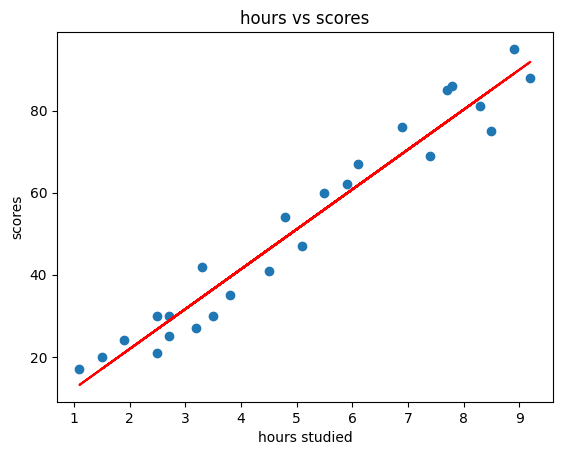

In [54]:
# regression line equation
line =reg.coef_ * X + reg.intercept_ 
#create line plot
plt.figure()
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.xlabel('hours studied')
plt.ylabel('scores')
plt.title('hours vs scores')
plt.show()

# What will be predicted score if a student studies 9.25 hour/day?

In [50]:
# Predicting
hrs = 9.25
prediction = reg.predict(np.array([[hrs]]))

# Printing the result
print("The score predicted for 9.25 Hours is:" ,prediction[0] ,"%")

The score predicted for 9.25 Hours is: 92.33571987331146 %
